# TP 2 : Approfondissement de Python : boucles, séries

## Courbes trigonométriques


En utilisant subplot pour créer deux sous-graphiques dans la même figure

* Tracer un cosinus avec 20 points en abscisse (bien observer les valeurs des abscisses et utiliser la fonction linspace de `numpy`) 
* Faire la même chose avec 200 points pour le deuxième graphique.
* Ajouter dans chaque sous-graphique une courbe sinus.
* Indiquer le nom des axes. 
* Mettre des titres, des légendes.
* Redéfinir les limites des axes. 

Vous devez obtenir la figure suivante:
![Fonctions Trigo](fctTrigo.png)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

xsmall = np.linspace(-2*np.pi,+2*np.pi,20)
xbig = np.linspace(-2*np.pi,+2*np.pi,200)


plt.subplot(211)
plt.plot(xsmall,np.cos(xsmall),'o-b',label='cos')
plt.plot(xsmall,np.sin(xsmall),'o-r',label='sin')
plt.title('Fonctions trigonométriques')
plt.ylabel('y')
plt.legend(fontsize=16)
plt.xlim(-10,10)
plt.ylim(-1.5,1.5)

plt.subplot(212)
plt.plot(xbig,np.cos(xbig),'-b',label='cos')
plt.plot(xbig,np.sin(xbig),'-r',label='sin')
plt.title('Fonctions trigonométriques')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(fontsize=16)
plt.xlim(-10,10)
plt.ylim(-1.5,1.5)
plt.tight_layout()      # Permet d'écarter les sous figures   
plt.savefig('fctTrigo.png')
plt.show()


<Figure size 640x480 with 2 Axes>

## Sommes et Produits

* Écrire un code avec une boucle *for* qui calcule la somme des entiers entre 1 et 13.
* Écrire un code avec une boucle *for* qui calcule le produit des entiers entre 1 et 13.


In [2]:
# On initialise Somme_Entier avec 0 l'élément neutre de la somme 
Somme_entier = 0

for ind in range(1,14):
    Somme_entier = Somme_entier + ind
    
print("La somme des entiers de 1 à 13 est égale à : "+str(Somme_entier) )

# Que l'on peut aussi calculer ave np.sum
print(np.sum(np.arange(1,14)))


# On initialise Produit_entier avec 1 l'élément neutre du produit
Produit_entier = 1

for ind in range(1,14):
    Produit_entier = Produit_entier*ind
    
print("La produit des entiers de 1 à 13 est égale à : "+str(Produit_entier) )

# Que l'on peut aussi calculer ave np.prod qui calcule le produit des éléments d'un tableau
print(np.prod(np.arange(1,14)))
# Ici c'est encore plus simple avec factoriel de numpy.
print(np.math.factorial(13))


La somme des entiers de 1 à 13 est égale à : 91
91
La produit des entiers de 1 à 13 est égale à : 6227020800
6227020800
6227020800


## Série de fonctions

Pour tout $x \in , ]0;+\infty[$, un développement en série à l'ordre N de la fonction ln(x) est donné par :
$$
ln_N(x) = 2 \sum_{n=0}^{N} \frac{1}{2n+1}\left(\frac{x-1}{x+1}\right)^ {2n+1}
$$

* En faisant varier $N$ de 0 à 100, calculer la valeur du développement pour $x=80$ et la valeur de l'erreur $E_N(80) = (ln_N(80) - ln(80))^2$. 
* Lors du calcul du développement et de l'erreur, vous allez stocker les valeurs dans un tableau afin de reproduire la figure ci-dessous:
![](DevLimitLn.png)

Prendre soin de mettre les titres, les noms des axes, d'utiliser subplot. Utiliser aussi la fonction `str` et une variable pour éviter les répétitions de code et saisir 80 plusieurs fois dans les titres ou labels des figures.

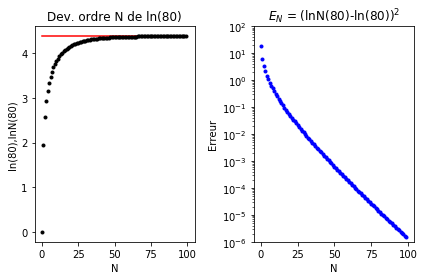

In [3]:
# Initialisation
N       = 100
x       = 80 #valeur de x pour laquelle on calcule le DL
Ln_N    = np.zeros(N)
 
for n in range(N-1):
    Ln_N[n+1] = Ln_N[n] + 2/(2*n+1)*((x-1)/(x+1))**(2*n+1)

Err = (Ln_N - np.log(x))**2 # Cette ligne crée Err et les opérations se font sur le tableau en entier.

plt.subplot(121) 
# plt.subplot(mnk)
# cette fonction reserve m lignes et n colonnes pour tracer ici 
# deux sous-figures l'une à côté de l'autre (k prend toutes les valeurs de 1 à m*n).

# On trace la valeur de ln(80) le long d'un segment dont les extremites 
# ont pour coordonnees :(0,ln(80)) et (100,ln(80))
plt.plot([0,N],[np.log(x),np.log(x)],'-r')
plt.plot(range(N),Ln_N,'.k')
plt.xlabel('N')
plt.ylabel('ln('+str(x)+'),lnN('+str(x)+')')
plt.title('Dev. ordre N de ln('+str(x)+')')

plt.subplot(122)
plt.semilogy(range(N),Err,'.b')
plt.xlabel('N')
plt.ylabel('Erreur')
plt.ylim((10**(-6),10**2))
plt.title('$E_N$ = (lnN('+str(x)+')-ln('+str(x)+'))$^2$') # mettre en $$ permet de faire 
                                       # des formules avec Latex
plt.tight_layout()      # Permet d'écarter les sous figures   
plt.savefig('DevLimitLn.png')                                       
plt.show()

Pour x réel, on donne le développement en série à l'ordre N de la fonction sin(x) :
$$
\sin_N(x) = \sum_{n=0}^N \frac{(-1)^n}{(2n+1)!} x^{2n+1}
$$
Pour $x \in [0,4\pi]$, 
* Pour différentes valeurs de N allant de 1 à 40, tracer en noir sur une même figure le développment tronqué à N.
* Superposer la courbe exacte sinus en rouge en trait plus épais 
comme le montre la figure ci-dessous. 
![](DevLimitSinus.png)

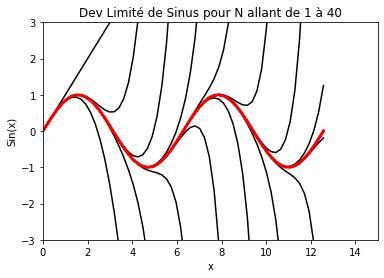

In [4]:
x = np.linspace(0,4*np.pi,60) # 60 points sont suffisants
N = 40
sin_N = np.zeros(np.size(x)) # Initialise le tableau a 0 de la taille de x

# boucle pour l'ordre N du developpement limité
for n in range (N):
    sin_N = sin_N + (-1)**n/np.math.factorial(2*n+1)*x**(2*n+1)
    plt.plot(x,sin_N,'k')
    


plt.plot(x,np.sin(x),'r',lw=3)
plt.xlim([0,15])
plt.ylim([-3,3]) 
plt.title('Dev Limité de Sinus pour N allant de 1 à '+str(N))
plt.xlabel('x')
plt.ylabel('Sin(x)')
plt.savefig('DevLimitSinus.png')
plt.show()


## Robot Olympiade

*Librement inspiré du sujet posé le 11 mars 2020 pour les Olympiades de Mathématiques en classe de première.*

Un robot avance ou recule uniquement en ligne droite. Il possède deux compteurs
indépendants qui obligent le robot à changer de sens et se remettent à zéro 
à chaque fois que le robot a parcouru une distance de 5 ou 8 centimètres 
respectivement. Le début de la séquence des changements de signes est donc 5,2,4,-1,....

Écrire un code qui répond au cahier des charges suivant:

* Sachant que le robot avance à 1cm/s, tracez la position du robot en centimètres en fonction du temps pour 500 secondes 

* On suppose que le robot est placé au milieu d'une table ronde de 50 centimètres de rayon. Écrire un message si le robot risque de tomber de la table.

*Indication : Pensez à utiliser la division entière (%) pour faire les changements de sens du robot.*

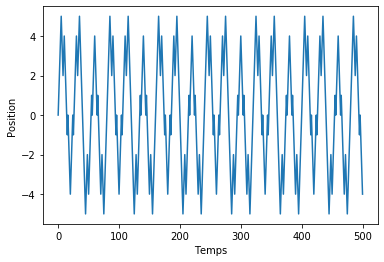

[1, 2, 3, 4, 5, 4, 3, 2, 3, 4, 3, 2, 1, 0, -1, 0, -1, -2, -3, -4, -3, -2, -1, 0, -1, 0, 1, 2, 3]


In [5]:
t = [0]     # tableau pour le temps
pos = [0]   # tableau contenant la position du robot
sens = +1   # 

stepmax = 500 

currentpos = 0 # Position initiale du robot.

for step in range(1,stepmax+1):
    currentpos = currentpos + sens
    if step%8 == 0:   # change de sens si step est un multiple de 8
        sens = -1*sens
    if step%5 == 0: # change de sens si step est un multiple de 5
        sens = -1*sens
    t.append(step) # Incrémente le tableau temps
    pos.append(currentpos) # Ajoute currentpos dans le tableau pos 
    if abs(currentpos) >= 50:
        print("Attention le robot va tomber")
        break

plt.plot(t,pos)
plt.ylabel('Position')
plt.xlabel('Temps')
plt.show()

print(pos[1:30])

# On remarque que pour ces paramètres, le robot fait un cycle et ne tombe pas de la table. 
# L'utilisation d'une liste est adaptée ici car le tableau est d'assez petite taille et 
# il est difficile de prévoir à l'avance combien d'éléments vont le constituer sil il tombe de la table.
# Pour de grands tableaux ou si la vitesse d'execution est primordiale, il faut mieux utiliser
# un tableau numpy qui alloue toute la mémoire en une fois même si on ne le remplit que partiellement. 

## Courbes paramétrées
 
 Les hypotrochoïdes sont des courbes décrites par un point lié à un disque roulant sans glisser intérieurement à un cercle de base. Ce sont des courbes que l’on obtient avec un spirographe avec disque interne. Ce qui nous intéresse dans cette partie du TP, c’est que bien que la formule mathématique soit toujours la même, la forme des courbes peut changer beaucoup lorsque l’on fait varier les paramètres qui la définissent. Nous allons nous intéresser aux rosaces qui sont des cas particuliers d’hypotrochoïde.

![image.png](ExplicationRosaces.png)

La représentation cartésienne des rosaces est définie par x=rcos(θ), y =rsin(θ), avec la définition du rapport entre le rayon et l’angle : r=cos(nθ) où n est le seul paramètre. Saurez-vous reproduire la figure suivante, qui représente une série de rosaces pour n=1,2,3,4,5, n=1/2,3/2,5/2,7/2,9/2 et n=1/3,2/3,4/3,5/3,7/3 ?
![image.png](Rosaces.png)
*Indications* : Faire un grand vecteur contenant toutes les valeurs de n. Utliser une boucle qui parcourt ce vecteur et trace les rosaces dans chaque case d'un tableau nblig x nbcol = 3 x 5 de sous-figures à l'aide de subplot(nblig,nbcol, ? )



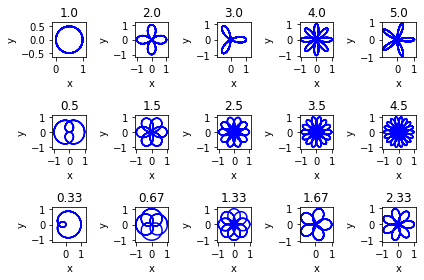

In [6]:
# Définitions des parametres.
n=np.array([1,2,3,4,5,1/2,3/2,5/2,7/2,9/2,1/3,2/3,4/3,5/3,7/3])

# On définit le nombre de lignes et de colonnes pour le subplot
nblig = 3
nbcol = 5

# On définit le vecteur ligne avec les angles (5 tours et 1000 points)
theta = np.linspace(0,10*np.pi,500)

for ind in range(len(n)):   
    r = np.cos(n[ind]*theta)
    x = r*np.cos(theta)
    y = r*np.sin(theta)
    plt.subplot(nblig,nbcol,ind+1) # ind+1 car les numéros des sous-figures commencent à 1
    plt.plot(x,y,'-b')
#    axis image
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(np.around(100*n[ind])/100) # Astuce pour n'afficher que 
                                         # deux chiffres apres la virgule
    plt.axis('equal')                                       
    plt.tight_layout() 

plt.savefig('Rosaces.png')                                   
plt.show()
